In [1]:
# Load modules
%matplotlib inline
import cosima_cookbook as cc
import dataset
import pandas as pd
import tqdm
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections

netcdf_index loaded.


In [2]:
salt_01 = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'salt',n=0,time_units='days since 1901-01-01').sel(time=slice('1901-01','1909-12')).mean('xt_ocean').mean('yt_ocean')
#obs_salt_01 = cc.get_nc_variable('woa13/01', 'woa13_ts_\d+_mom01.nc', 'salt').isel(time=0).mean('GRID_X_T').mean('GRID_Y_T')
salt_01_start = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'salt',n=0,time_units='days since 1901-01-01').isel(time=0).mean('xt_ocean').mean('yt_ocean')

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=34), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=34), HTML(value='')))

In [3]:
#salt_01_drift = salt_01 - obs_salt_01.values
salt_01_drift = salt_01 - salt_01_start
salt_01_drift

<xarray.DataArray 'salt' (time: 108, st_ocean: 75)>
dask.array<shape=(108, 75), dtype=float64, chunksize=(1, 7)>
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 4.332 5.869 7.569 9.447 ...
  * time      (time) datetime64[ns] 1901-01-16T12:00:00 1901-02-15 ...

In [4]:
salt_10 = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss6p5', 'ocean.nc', 'salt',n=0, time_units = 'days since 1700-01-01').mean('xt_ocean').mean('yt_ocean')
#obs_salt_10 = xr.open_mfdataset('/g/data3/hh5/tmp/cosima/woa13/10_KDS75/output000/woa13_ts_*_mom10.nc').salt.isel(time=0).mean('GRID_X_T').mean('GRID_Y_T')
salt_10_start = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss6p5', 'ocean.nc', 'salt',n=0, time_units = 'days since 1700-01-01').isel(time=0).mean('xt_ocean').mean('yt_ocean')
#salt_10_drift = salt_10-obs_salt_10.values
salt_10_drift = salt_10-salt_10_start

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=22), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=22), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


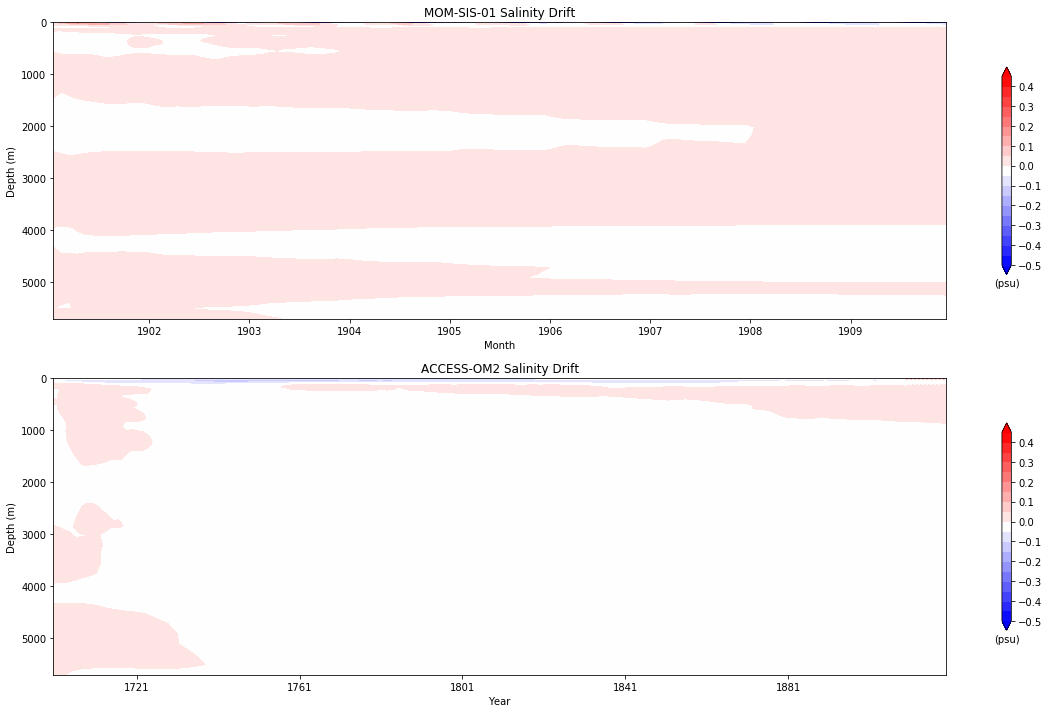

In [5]:
fig,ax=plt.subplots(2,1,figsize=(20,12))
plt.subplot(2,1,1)
clev = np.arange(-0.5,0.5,0.05)
plt.contourf(salt_01_drift.time.values,salt_01_drift.st_ocean,salt_01_drift.transpose('st_ocean','time'),cmap=plt.cm.bwr,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('(psu)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Month')
plt.title('MOM-SIS-01 Salinity Drift')

plt.subplot(2,1,2)
#clev = np.arange(-1,1,0.1)
ax=plt.contourf(salt_10_drift.time.values,salt_10_drift.st_ocean,salt_10_drift.transpose('st_ocean','time'),cmap=plt.cm.bwr,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('(psu)')
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('ACCESS-OM2 Salinity Drift')

#ax[-1,-1].axis('off')
plt.savefig('plot_salinity_drift.png')